# 台灣銀行牌告匯率爬蟲練習
## 範例1： 練習爬取台幣對其他貨幣匯率資料

In [1]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

### 進入台灣銀行牌告匯率網頁：https://rate.bot.com.tw/xrt?Lang=zh-TW ，擷取當日台幣對美金的匯率資訊

In [2]:
# 進入台灣銀行牌告匯率網頁，查看當日匯率資料
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
response = requests.get(url)
response.encoding = 'utf-8'
# print(resp.text)  # 如有需要，列印出網頁原始碼

html = BeautifulSoup(response.text, "html5lib")
rate_table = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')
#rate_table

In [3]:
# 查詢美金(也就是匯率表的第一個元素)對台幣的匯率
currency = rate_table[0].find(name='div', attrs={'class':'visible-phone print_hide'})
print(currency.get_text().replace(" ", ""))  # 去掉空白

buy_rate = rate_table[0].find(name='td', attrs={'data-table':'本行現金買入'})
sell_rate = rate_table[0].find(name='td', attrs={'data-table':'本行現金賣出'})
print("即時現金買入: %s, 即時現金賣出: %s" % (buy_rate.get_text(), sell_rate.get_text()))


美金(USD)

即時現金買入: 27.415, 即時現金賣出: 28.085


### 作業part 1：請參考上面的範例，試著爬取所有貨幣對台幣的匯率

In [4]:
for each_rate in rate_table:
    currency = each_rate.find(name='div', attrs={'class':'visible-phone print_hide'}).get_text().replace(" ","").replace("\n", "") #替換空格+換行取消
    buy_rate = each_rate.find(name="td", attrs={"data-table":"本行現金買入"}).get_text()
    print("台幣->", currency)
    print(buy_rate, "\n")

台幣-> 美金(USD)
27.415 

台幣-> 港幣(HKD)
3.409 

台幣-> 英鎊(GBP)
35.78 

台幣-> 澳幣(AUD)
19.58 

台幣-> 加拿大幣(CAD)
21.24 

台幣-> 新加坡幣(SGD)
19.81 

台幣-> 瑞士法郎(CHF)
29.35 

台幣-> 日圓(JPY)
0.2346 

台幣-> 南非幣(ZAR)
- 

台幣-> 瑞典幣(SEK)
2.68 

台幣-> 紐元(NZD)
18.44 

台幣-> 泰幣(THB)
0.7033 

台幣-> 菲國比索(PHP)
0.483 

台幣-> 印尼幣(IDR)
0.00158 

台幣-> 歐元(EUR)
30.65 

台幣-> 韓元(KRW)
0.02176 

台幣-> 越南盾(VND)
0.00096 

台幣-> 馬來幣(MYR)
5.594 

台幣-> 人民幣(CNY)
4.268 



## 範例2：爬取一個月的美金對台幣歷史匯率資料，並畫出趨勢圖

In [5]:
# 先到牌告匯率首頁，爬取所有貨幣的種類
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
response = requests.get(url)
response.encoding = 'utf-8'
html = BeautifulSoup(response.text, "html5lib")
rate_table = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')

In [6]:
# 擷取匯率表格，把美金(也就是匯率表的第一個元素)擷取出來，查詢其歷史匯率
currency = rate_table[0].find(name='div', attrs={'class':'visible-phone print_hide'})
print(currency.get_text().replace(" ", "").replace("\n",""))

# 針對美金，找到其「歷史匯率」的首頁 
history_link = rate_table[0].find(name='td', attrs={'data-table':'歷史匯率'})

# 該貨幣的歷史資料首頁
#<a href="/xrt/history/USD?Lang=zh-TW" target="_blank" title="美金 歷史匯率 (另開視窗)">
history_rate_link = "https://rate.bot.com.tw" + history_link.a["href"]
print(history_rate_link)

美金(USD)
https://rate.bot.com.tw/xrt/history/USD?Lang=zh-TW


In [7]:
# 到貨幣歷史匯率網頁，選則該貨幣的「歷史區間」，送出查詢後，觀察其網址變化情形，再試著抓取其歷史匯率資料
#
# 用「quote/年-月」去取代網址內容，就可以連到該貨幣的歷史資料
# 舉例：https://rate.bot.com.tw/xrt/quote/2021-10/USD 為美金2021/10月的匯率

quote_history_url = history_rate_link.replace("history", "quote/2021-10")
response = requests.get(quote_history_url)
response.encoding = 'utf-8'
history = BeautifulSoup(response.text, "html5lib")
#history
history_table = history.find(name='table', attrs={'title':'歷史本行營業時間牌告匯率'}).find(name='tbody').find_all(name='tr')

<Figure size 720x576 with 0 Axes>

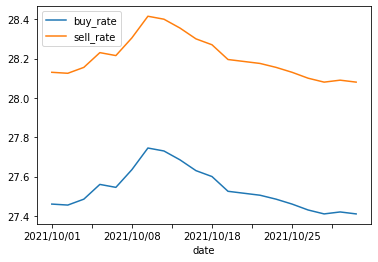

In [8]:
#
# 擷取到歷史匯率資料後，把資料彙整起來並畫出趨勢圖
#
date_history = list()
history_buy = list()
history_sell = list()

for history_rate in history_table:
    # 擷取日期資料
    date_string = history_rate.a.get_text()
    date = datetime.strptime(date_string, '%Y/%M/%d').strftime('%Y/%M/%d')  # 轉換日期格式
    date_history.append(date)  # 日期歷史資料

    history_ex_rate = history_rate.find_all(name='td', attrs={'class':'rate-content-cash text-right print_table-cell'})
    history_buy.append(float(history_ex_rate[0].get_text()))  # 歷史買入匯率
    history_sell.append(float(history_ex_rate[1].get_text()))  # 歷史賣出匯率

# 將匯率資料建成dataframe形式
HistoryExchangeRate = pd.DataFrame({'date': date_history,
                                    'buy_rate':history_buy,
                                    'sell_rate':history_sell})

HistoryExchangeRate = HistoryExchangeRate.set_index('date')  # 指定日期欄位為datafram的index
HistoryExchangeRate = HistoryExchangeRate.sort_index(ascending=True)

# 畫出歷史匯率軌跡圖
plt.figure(figsize=(10, 8))
HistoryExchangeRate[['buy_rate','sell_rate']].plot()  # x=['date'], y=[['buy_rate','sell_rate']] 
plt.legend(loc="upper left")
plt.show()

### 作業part 2：爬取每種貨幣對台幣的一個月歷史匯率資料，並畫出趨勢圖

In [9]:
# 繪製歷史價格
def plot_history(history_table):

    date_history = list()
    history_buy = list()
    history_sell = list()

    for history_rate in history_table:
        # 擷取日期資料
        date_string = history_rate.a.get_text()
        date = datetime.strptime(date_string, '%Y/%M/%d').strftime('%Y/%M/%d')  # 轉換日期格式
        date_history.append(date)  # 日期歷史資料

        history_ex_rate = history_rate.find_all(name='td', attrs={'class':'rate-content-cash text-right print_table-cell'})
        history_buy.append(float(history_ex_rate[0].get_text()))  # 歷史買入匯率
        history_sell.append(float(history_ex_rate[1].get_text()))  # 歷史賣出匯率

    # 將匯率資料建成dataframe形式
    HistoryExchangeRate = pd.DataFrame({'date': date_history,
                                        'buy_rate':history_buy,
                                        'sell_rate':history_sell})

    HistoryExchangeRate = HistoryExchangeRate.set_index('date')  # 指定日期欄位為datafram的index
    HistoryExchangeRate = HistoryExchangeRate.sort_index(ascending=True)

    # 畫出歷史匯率軌跡圖
    plt.figure(figsize=(10, 8))
    HistoryExchangeRate[['buy_rate','sell_rate']].plot()  # x=['date'], y=[['buy_rate','sell_rate']] 
    plt.legend(loc="center")
    plt.show()

In [10]:
# 爬取各個貨幣
def get_each_currency_history_2021_11(history_rate_link):
    quote_history_url = history_rate_link.replace("history", "quote/2021-11")  #爬上個月的
    response = requests.get(quote_history_url)
    response.encoding = 'utf-8'
    history = BeautifulSoup(response.text, "html5lib")
    history_table = history.find(name='table', attrs={'title':'歷史本行營業時間牌告匯率'}).find(name='tbody').find_all(name='tr')
    return history_table

美金(USD)


<Figure size 720x576 with 0 Axes>

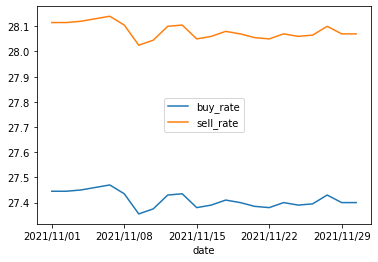

港幣(HKD)


<Figure size 720x576 with 0 Axes>

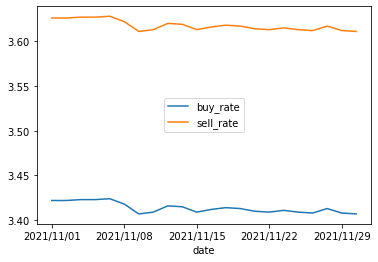

英鎊(GBP)


<Figure size 720x576 with 0 Axes>

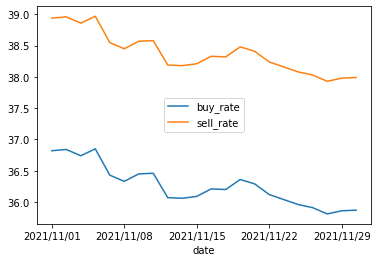

澳幣(AUD)


<Figure size 720x576 with 0 Axes>

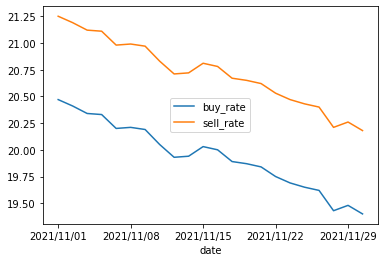

加拿大幣(CAD)


<Figure size 720x576 with 0 Axes>

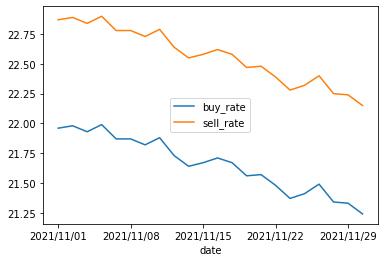

新加坡幣(SGD)


<Figure size 720x576 with 0 Axes>

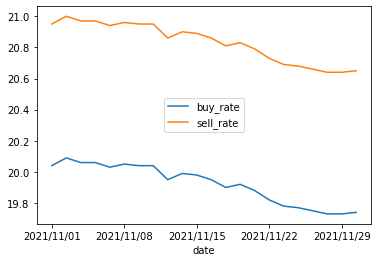

瑞士法郎(CHF)


<Figure size 720x576 with 0 Axes>

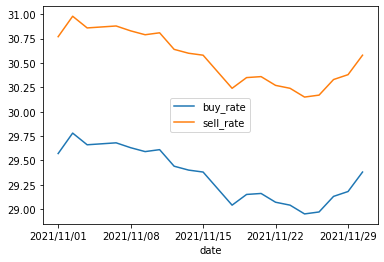

日圓(JPY)


<Figure size 720x576 with 0 Axes>

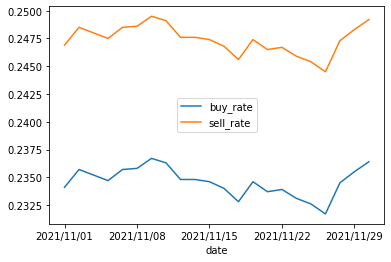

南非幣(ZAR)


<Figure size 720x576 with 0 Axes>

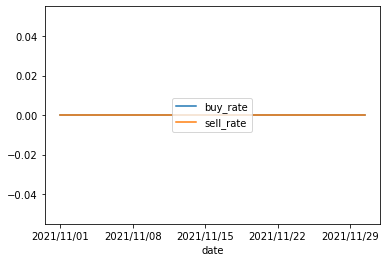

瑞典幣(SEK)


<Figure size 720x576 with 0 Axes>

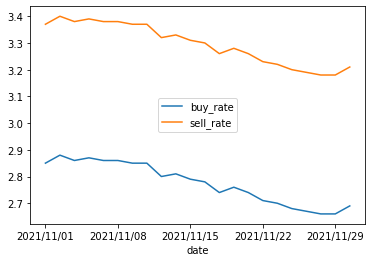

紐元(NZD)


<Figure size 720x576 with 0 Axes>

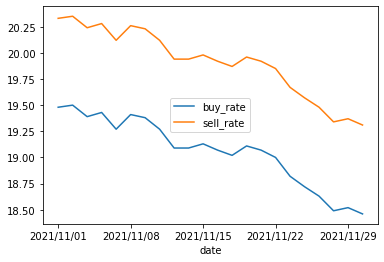

泰幣(THB)


<Figure size 720x576 with 0 Axes>

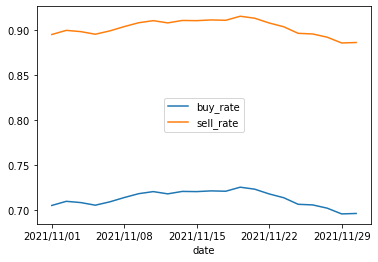

菲國比索(PHP)


<Figure size 720x576 with 0 Axes>

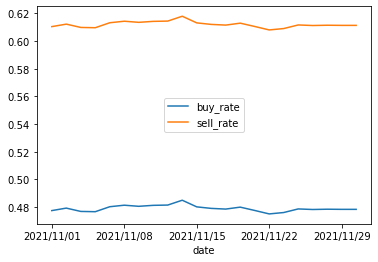

印尼幣(IDR)


<Figure size 720x576 with 0 Axes>

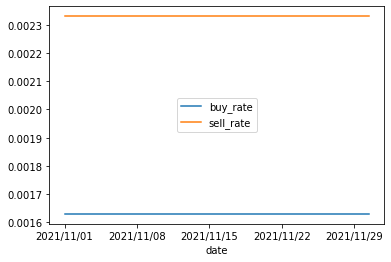

歐元(EUR)


<Figure size 720x576 with 0 Axes>

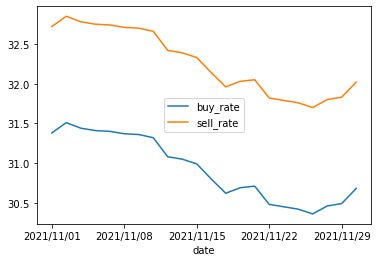

韓元(KRW)


<Figure size 720x576 with 0 Axes>

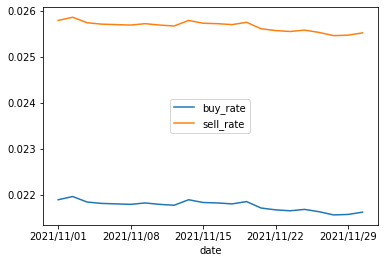

越南盾(VND)


<Figure size 720x576 with 0 Axes>

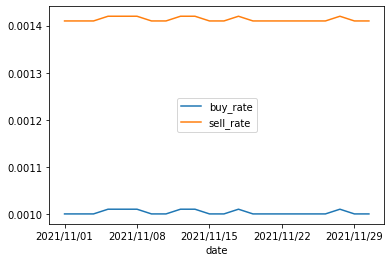

馬來幣(MYR)


<Figure size 720x576 with 0 Axes>

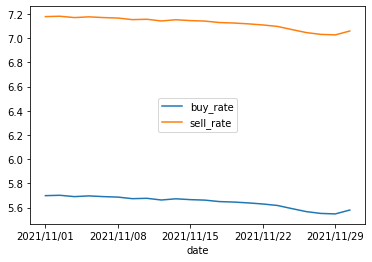

人民幣(CNY)


<Figure size 720x576 with 0 Axes>

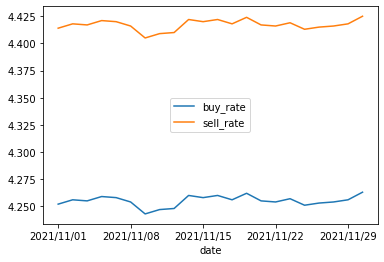

In [11]:
for each_currency in rate_table:
    currency = each_currency.find(name='div', attrs={'class':'visible-phone print_hide'})
    print(currency.get_text().replace(" ", "").replace("\n",""))
    history_link = each_currency.find(name='td', attrs={'data-table':'歷史匯率'})
    history_rate_link = "https://rate.bot.com.tw" + history_link.a["href"]

    history_table_each_currency = get_each_currency_history_2021_11(history_rate_link=history_rate_link)
    plot_history(history_table=history_table_each_currency)